In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# 
df=pd.read_csv('resources/customer_data.csv')


In [4]:
df.head(5)

id  age  gender  income   education region loyalty_status  \
0   1   27    Male   40682    Bachelor   East           Gold   
1   2   29    Male   15317     Masters   West        Regular   
2   3   37    Male   38849    Bachelor   West         Silver   
3   4   30    Male   11568  HighSchool  South        Regular   
4   5   31  Female   46952     College  North        Regular   

  purchase_frequency  purchase_amount product_category  promotion_usage  \
0           frequent            18249            Books                0   
1               rare             4557         Clothing                1   
2               rare            11822         Clothing                0   
3           frequent             4098             Food                0   
4         occasional            19685         Clothing                1   

   satisfaction_score  
0                   6  
1                   6  
2                   6  
3                   7  
4                   5

In [5]:
df.tail(5)

id  age  gender  income   education region loyalty_status  \
99995   99996   31  Female   19691     College   West        Regular   
99996   99997   36    Male   17428  HighSchool  South        Regular   
99997   99998   29    Male   13222     College   West        Regular   
99998   99999   31  Female   40093    Bachelor   West        Regular   
99999  100000   35  Female   22249     College   West         Silver   

      purchase_frequency  purchase_amount product_category  promotion_usage  \
99995         occasional             7075           Health                0   
99996               rare             6873           Health                0   
99997           frequent             5152         Clothing                0   
99998           frequent            16312           Health                1   
99999               rare             9426           Health                0   

       satisfaction_score  
99995                   7  
99996                   5  
99997                   5  
99998                   5  
99999                   6

In [6]:
df.dtypes


id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object

In [7]:
gender=df['gender'].value_counts()
gender

gender
Female    50074
Male      49926
Name: count, dtype: int64

In [8]:
df['region'].value_counts()


region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

In [9]:
df.describe()


id            age         income  purchase_amount  \
count  100000.000000  100000.000000  100000.000000    100000.000000   
mean    50000.500000      30.003260   27516.269880      9634.790840   
std     28867.657797       4.480535   12996.782587      4799.339449   
min         1.000000      12.000000    5000.000000      1118.000000   
25%     25000.750000      27.000000   16271.750000      5583.000000   
50%     50000.500000      30.000000   27584.500000      9452.000000   
75%     75000.250000      33.000000   38747.250000     13350.000000   
max    100000.000000      49.000000   50000.000000     26204.000000   

       promotion_usage  satisfaction_score  
count    100000.000000       100000.000000  
mean          0.300800            5.009650  
std           0.458608            1.038714  
min           0.000000            0.000000  
25%           0.000000            4.000000  
50%           0.000000            5.000000  
75%           1.000000            6.000000  
max           1.000000           10.000000

In [10]:
df['education'].value_counts()

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

In [11]:
df['loyalty_status'].value_counts()

loyalty_status
Regular    60138
Silver     29964
Gold        9898
Name: count, dtype: int64

In [12]:
df['product_category'].value_counts()

product_category
Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: count, dtype: int64

In [13]:
df['satisfaction_score'].value_counts()

satisfaction_score
5     38490
6     24315
4     23854
7      6123
3      6018
8       616
2       534
9        30
1        18
10        1
0         1
Name: count, dtype: int64

In [14]:
df['purchase_frequency'].value_counts()

purchase_frequency
rare          50019
occasional    29886
frequent      20095
Name: count, dtype: int64

In [15]:
df['promotion_usage'].value_counts()

promotion_usage
0    69920
1    30080
Name: count, dtype: int64

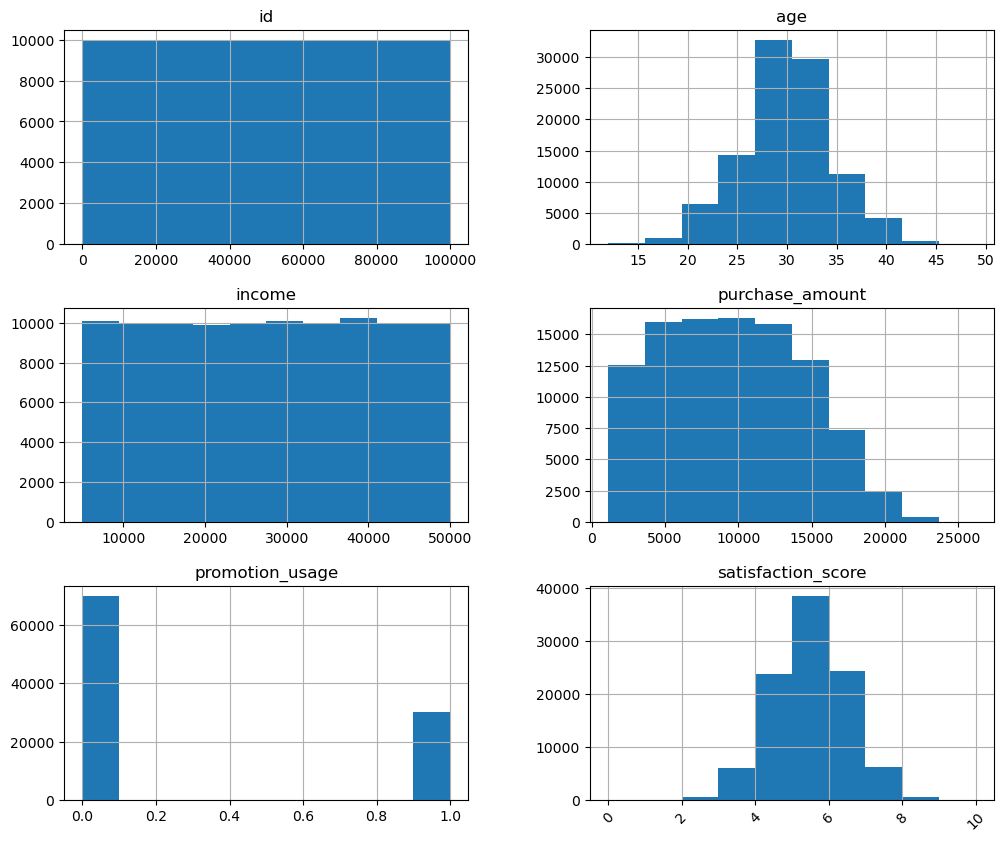

In [16]:
df.hist(figsize=(12, 10))
plt.xticks(rotation=45)  # Improve readability for categorical features
plt.show()

In [17]:
# How does promotion usage relate to purchase frequency?

In [18]:
#Data Frame Seperating data by id, Gender, Purchase Frequency, Purchase Amount, Product Category, and Promotion Usage
promotion_data = df.drop(['age', 'income', 'education', 'region', 'satisfaction_score', 'loyalty_status'], axis = 1)
promotion_data = promotion_data.dropna()
promotion_data

id  gender purchase_frequency  purchase_amount product_category  \
0           1    Male           frequent            18249            Books   
1           2    Male               rare             4557         Clothing   
2           3    Male               rare            11822         Clothing   
3           4    Male           frequent             4098             Food   
4           5  Female         occasional            19685         Clothing   
...       ...     ...                ...              ...              ...   
99995   99996  Female         occasional             7075           Health   
99996   99997    Male               rare             6873           Health   
99997   99998    Male           frequent             5152         Clothing   
99998   99999  Female           frequent            16312           Health   
99999  100000  Female               rare             9426           Health   

       promotion_usage  
0                    0  
1                    1  
2                    0  
3                    0  
4                    1  
...                ...  
99995                0  
99996                0  
99997                0  
99998                1  
99999                0  

[100000 rows x 6 columns]

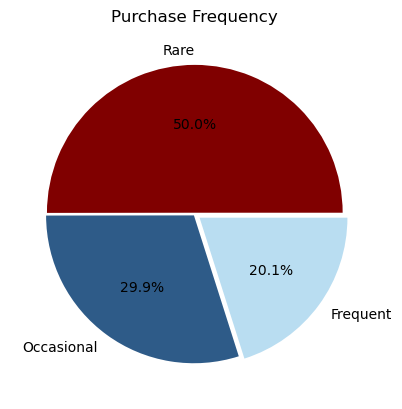

In [61]:
promotion_data['purchase_frequency'].value_counts().plot(kind='pie',
                                                         autopct='%1.1f%%',
                                                         labels=['Rare','Occasional','Frequent'],
                                                         explode=[0.01,0.01,0.04],
                                                        colors=["maroon","#2E5B88", "#B9DDF1"])
plt.title('Purchase Frequency')
plt.ylabel('')
plt.show()

In [19]:
#Promotion Used DataFrame
promotion_used = promotion_data[promotion_data['promotion_usage'] > 0]
promotion_used.head(100)

id  gender purchase_frequency  purchase_amount product_category  \
1      2    Male               rare             4557         Clothing   
4      5  Female         occasional            19685         Clothing   
10    11    Male               rare            16158             Home   
12    13    Male         occasional             2450         Clothing   
13    14  Female         occasional             5579            Books   
..   ...     ...                ...              ...              ...   
328  329  Female         occasional            16138         Clothing   
329  330  Female         occasional             4709         Clothing   
333  334    Male               rare            10953            Books   
337  338    Male               rare            15592           Beauty   
339  340    Male               rare             7372             Food   

     promotion_usage  
1                  1  
4                  1  
10                 1  
12                 1  
13                 1  
..               ...  
328                1  
329                1  
333                1  
337                1  
339                1  

[100 rows x 6 columns]

In [59]:
len(promotion_used['purchase_frequency'])

30080

In [20]:
promotion_used['purchase_frequency'].value_counts()

purchase_frequency
rare          15066
occasional     8988
frequent       6026
Name: count, dtype: int64

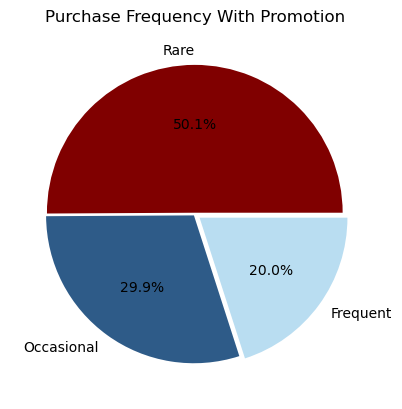

In [64]:
#Promotion Used Visualizations
promotion_used['purchase_frequency'].value_counts().plot(kind='pie',
                                                         autopct='%1.1f%%',
                                                         labels=['Rare','Occasional','Frequent'],
                                                         explode=[0.01,0.01,0.04],
                                                        colors=["maroon","#2E5B88", "#B9DDF1"])
plt.title('Purchase Frequency With Promotion')
plt.ylabel('')
plt.show()

In [22]:
#No Promotion Used DataFrame
no_promotion_used = promotion_data[promotion_data['promotion_usage'] < 1]
no_promotion_used.head(100)

id  gender purchase_frequency  purchase_amount product_category  \
0      1    Male           frequent            18249            Books   
2      3    Male               rare            11822         Clothing   
3      4    Male           frequent             4098             Food   
5      6    Male         occasional             2822      Electronics   
6      7  Female           frequent             3293         Clothing   
..   ...     ...                ...              ...              ...   
140  141    Male         occasional             6098      Electronics   
141  142  Female               rare            13441         Clothing   
144  145  Female               rare            11515      Electronics   
145  146    Male               rare            13114             Food   
146  147    Male         occasional            19674             Food   

     promotion_usage  
0                  0  
2                  0  
3                  0  
5                  0  
6                  0  
..               ...  
140                0  
141                0  
144                0  
145                0  
146                0  

[100 rows x 6 columns]

In [58]:
#
len(no_promotion_used['purchase_frequency'])

69920

In [23]:
no_promotion_used['purchase_frequency'].value_counts()

purchase_frequency
rare          34953
occasional    20898
frequent      14069
Name: count, dtype: int64

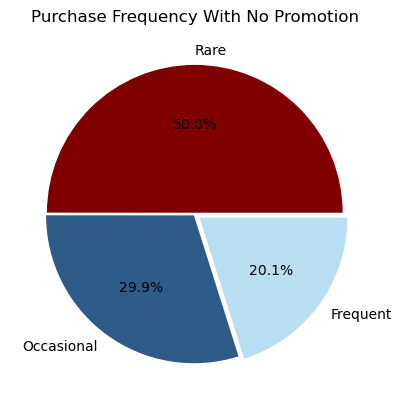

In [63]:
#No Promotion Used Visualizations
no_promotion_used['purchase_frequency'].value_counts().plot(kind='pie',
                                                         autopct='%1.1f%%',
                                                         labels=['Rare','Occasional','Frequent'],
                                                         explode=[0.01,0.01,0.04],
                                                        colors=["maroon","#2E5B88", "#B9DDF1"])
plt.title('Purchase Frequency With No Promotion')
plt.ylabel('')
plt.show()